# 1. Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-prediction-dataset/Train.csv
/kaggle/input/co2-prediction-dataset/Test.csv


In [2]:
import random

seed = 845
random.seed(seed)
np.random.seed(seed)

In [3]:
train = pd.read_csv('/kaggle/input/co2-prediction-dataset/Train.csv')
test = pd.read_csv('/kaggle/input/co2-prediction-dataset/Test.csv')

In [4]:
train.tail(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
73995,ID_-33.93_25.67_2022_40,-33.93,25.67,2022,40,-0.000149,0.609458,-0.000100,0.058038,12.058772,...,6174.346100,56910.925272,5209.943493,15.233530,0.062163,-44.852367,40.754984,-56.284033,44.183908,33.455060
73996,ID_-33.93_25.67_2022_41,-33.93,25.67,2022,41,0.000200,0.508878,0.000102,0.176190,76.750587,...,5565.660494,60367.230003,4569.550846,15.642662,0.056052,-7.823239,47.817025,-53.009526,39.309071,33.916084
73997,ID_-33.93_25.67_2022_42,-33.93,25.67,2022,42,0.000348,0.367644,0.000119,0.105165,-15.520863,...,1485.299674,96443.056281,498.939745,7.904250,0.049186,-87.988102,60.753029,-68.248364,46.490365,33.760140
73998,ID_-33.93_25.67_2022_43,-33.93,25.67,2022,43,0.000131,0.591156,0.000081,0.131979,-58.892293,...,3198.924707,82131.814889,2214.987210,12.346231,0.057180,-31.872854,44.671932,-60.195033,36.376865,34.731620
73999,ID_-33.93_25.67_2022_44,-33.93,25.67,2022,44,-0.000045,0.487801,-0.000026,0.048319,40.289887,...,7492.379566,48463.009199,6492.463545,14.733266,0.068425,-4.254684,55.617739,-62.974923,35.872282,33.962612
74000,ID_-33.93_25.67_2022_45,-33.93,25.67,2022,45,0.001192,0.322510,0.000358,0.113889,-95.875226,...,6380.936608,54160.486756,5380.936607,32.711150,0.088256,-22.750184,51.561352,-67.067758,35.438041,34.115240
74001,ID_-33.93_25.67_2022_46,-33.93,25.67,2022,46,0.000196,0.393484,0.000081,0.095715,-104.357543,...,6080.303261,56345.002370,5080.302846,5.022155,0.030810,-21.652201,57.599384,-69.915866,33.520840,35.865158
74002,ID_-33.93_25.67_2022_47,-33.93,25.67,2022,47,0.000114,0.445499,0.000054,0.007275,76.966014,...,1478.970433,95206.933265,517.846957,4.096226,0.080515,-94.985989,62.034106,-83.159080,42.204499,35.511803
74003,ID_-33.93_25.67_2022_48,-33.93,25.67,2022,48,0.000092,0.377850,0.000035,0.077744,-12.476655,...,1722.604370,88203.562500,1166.031128,9.418262,0.113354,-105.555237,57.863998,-83.368256,39.928902,35.907146
74004,ID_-33.93_25.67_2022_52,-33.93,25.67,2022,52,0.000630,0.306275,0.000148,0.050941,-11.587875,...,3277.760986,78231.390625,2277.760986,11.204159,0.060431,76.545792,42.240990,-64.098320,21.118671,28.858446


In [5]:
test.head(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-23.53_27.47_2019_1,-23.53,27.47,2019,1,0.000077,0.454468,0.000034,0.114291,-80.286309,...,74897.052000,2180.266538,81287.074479,1562.031017,10.734123,0.280660,-31.230174,33.337966,-93.217261,23.358251
1,ID_-23.53_27.47_2019_2,-23.53,27.47,2019,2,0.000181,0.423171,0.000062,0.075100,-17.765690,...,84222.653521,982.619057,90307.650011,927.111222,5.250020,0.238933,66.490898,58.137794,-85.001467,13.416481
2,ID_-23.53_27.47_2019_3,-23.53,27.47,2019,3,0.000059,0.713085,0.000043,0.114210,16.725653,...,78922.490786,1582.964934,85383.151853,1006.778109,6.819371,0.258681,75.923186,41.336951,-83.267543,16.273000
3,ID_-23.53_27.47_2019_4,-23.53,27.47,2019,4,0.000483,0.434454,0.000171,0.131394,-22.475340,...,61135.919587,3935.419981,67490.031362,3428.423528,6.233628,0.281542,-11.023230,60.689869,-77.763718,22.793961
4,ID_-23.53_27.47_2019_5,-23.53,27.47,2019,5,0.000193,0.783044,0.000141,0.161142,4.750356,...,78494.247391,1647.538526,84478.743043,1122.534093,11.810251,0.281564,-13.294513,51.007132,-76.620646,23.198242
5,ID_-23.53_27.47_2019_6,-23.53,27.47,2019,6,0.000352,0.800362,0.000272,0.186770,-42.881042,...,44397.257457,5861.375890,50895.947743,4811.353128,15.724004,0.290591,-13.403980,50.989988,-74.027957,25.443463
6,ID_-23.53_27.47_2019_7,-23.53,27.47,2019,7,0.000024,0.554036,0.000022,0.171981,-92.533724,...,54642.497552,4952.679776,62184.813793,4170.802031,10.980211,0.299461,-5.382409,56.747587,-64.267447,24.301564
7,ID_-23.53_27.47_2019_8,-23.53,27.47,2019,8,0.000817,0.441789,0.000332,0.131128,-77.145632,...,74428.462927,2199.293668,79987.939729,1567.132185,7.910361,0.281772,-51.655631,43.523188,-66.028159,28.836579
8,ID_-23.53_27.47_2019_9,-23.53,27.47,2019,9,0.000236,0.481039,0.000107,0.121613,-88.474751,...,88115.714083,937.774303,90591.973069,909.771419,5.415221,0.259020,-13.529459,58.167016,-55.218008,28.492048
9,ID_-23.53_27.47_2019_10,-23.53,27.47,2019,10,0.000317,0.572589,0.000181,0.105957,-0.649369,...,86261.885650,1088.232875,89646.145625,913.192246,5.410814,0.252502,16.300892,39.900926,-49.128086,27.331096


In [6]:
train.isna().sum()

ID_LAT_LON_YEAR_WEEK             0
latitude                         0
longitude                        0
year                             0
week_no                          0
                              ... 
Cloud_sensor_azimuth_angle    2724
Cloud_sensor_zenith_angle     2724
Cloud_solar_azimuth_angle     2724
Cloud_solar_zenith_angle      2724
emission                         0
Length: 76, dtype: int64

In [7]:
test.isna().sum()

ID_LAT_LON_YEAR_WEEK             0
latitude                         0
longitude                        0
year                             0
week_no                          0
                              ... 
Cloud_surface_albedo          1133
Cloud_sensor_azimuth_angle    1133
Cloud_sensor_zenith_angle     1133
Cloud_solar_azimuth_angle     1133
Cloud_solar_zenith_angle      1133
Length: 75, dtype: int64

In [8]:
print(train.shape)
print(test.shape)

(74005, 76)
(28085, 75)


In [9]:
train.describe(include="all")

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,74005,74005.000000,74005.000000,74005.000000,74005.000000,72075.000000,72075.000000,72075.000000,72075.000000,72075.000000,...,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,7.400500e+04
unique,74005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.73_28.77_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.829723,27.782742,2020.478049,26.156098,0.000263,0.515875,0.000091,0.105690,4.487627,...,3652.349722,74390.624457,2871.262815,15.825386,0.225441,-14.277119,49.567836,-50.513220,40.558959,7.891061e+03
std,NaN,2.760589,2.746672,1.111261,14.843840,0.000599,0.196766,0.000199,0.069555,52.246537,...,1807.385280,12859.067332,1645.827671,19.696645,0.063131,47.277321,12.097417,20.623907,12.201179,5.257160e+04
min,NaN,-33.930000,21.070000,2019.000000,1.000000,-0.000989,0.133738,-0.000828,0.000000,-110.027657,...,128.299794,14541.977986,10.300364,1.151138,0.000000,-125.298058,0.100882,-97.570906,10.906227,4.806346e-02
25%,NaN,-29.630000,26.670000,2019.000000,13.000000,-0.000066,0.371745,-0.000034,0.052482,-18.178128,...,2260.917450,65920.340500,1602.615232,5.071849,0.183490,-31.952090,41.329129,-67.987723,29.786592,1.545472e+02
50%,NaN,-28.130000,28.770000,2020.000000,26.000000,0.000147,0.488695,0.000073,0.099513,-10.987544,...,3437.878915,75994.802018,2563.926290,8.609041,0.223503,-13.738030,53.233031,-45.413921,40.117572,7.231359e+02
75%,NaN,-25.730000,29.470000,2021.000000,39.000000,0.000441,0.623530,0.000191,0.152480,59.119988,...,4745.607936,84409.691135,3819.671389,17.478625,0.267716,3.790391,59.478133,-33.124961,51.445698,2.773029e+03


In [10]:
test.describe(include="all")

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
count,28085,28085.000000,28085.000000,28085.000000,28085.000000,27168.000000,27168.000000,27168.000000,27168.000000,27168.000000,...,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000
unique,28085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.53_27.47_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.659927,27.679489,2020.478049,26.156098,0.000408,0.479412,0.000147,0.109034,3.593182,...,67146.897767,3732.987021,73290.409306,2975.243395,14.553957,0.222251,-16.226959,49.973287,-51.061556,40.363462
std,NaN,3.147071,3.953095,1.111273,14.844004,0.000694,0.185203,0.000235,0.070031,50.977486,...,13114.552110,1791.381622,12523.723569,1609.802656,17.396373,0.055726,46.873647,12.076966,20.378958,12.425623
min,NaN,-34.030000,18.370000,2019.000000,1.000000,-0.000997,0.136354,-0.000827,0.000000,-106.342976,...,13468.169925,41.779261,15849.837802,0.301802,1.000000,0.000000,-118.005679,0.113536,-97.145958,11.084878
25%,NaN,-28.130000,27.670000,2019.000000,13.000000,0.000004,0.334740,0.000002,0.054825,-18.052725,...,58141.778481,2366.468502,65100.436334,1805.892248,5.044690,0.182856,-32.190337,42.230868,-68.564190,29.771236
50%,NaN,-27.730000,29.770000,2020.000000,26.000000,0.000256,0.456401,0.000117,0.103155,-11.306408,...,67662.244391,3533.683514,74883.044228,2673.371149,8.624943,0.214512,-13.677169,53.700167,-45.805551,39.853395
75%,NaN,-24.030000,30.070000,2021.000000,39.000000,0.000632,0.579827,0.000253,0.158492,56.920923,...,76997.720804,4835.174050,82189.400173,3907.250928,16.190492,0.259952,-0.642704,59.503624,-33.299592,51.452037


In [11]:
train.emission.describe(include="all")

count    7.400500e+04
mean     7.891061e+03
std      5.257160e+04
min      4.806346e-02
25%      1.545472e+02
50%      7.231359e+02
75%      2.773029e+03
max      1.181701e+06
Name: emission, dtype: float64

# 2. Missing Values

### 2.1 Get percentage of missing values

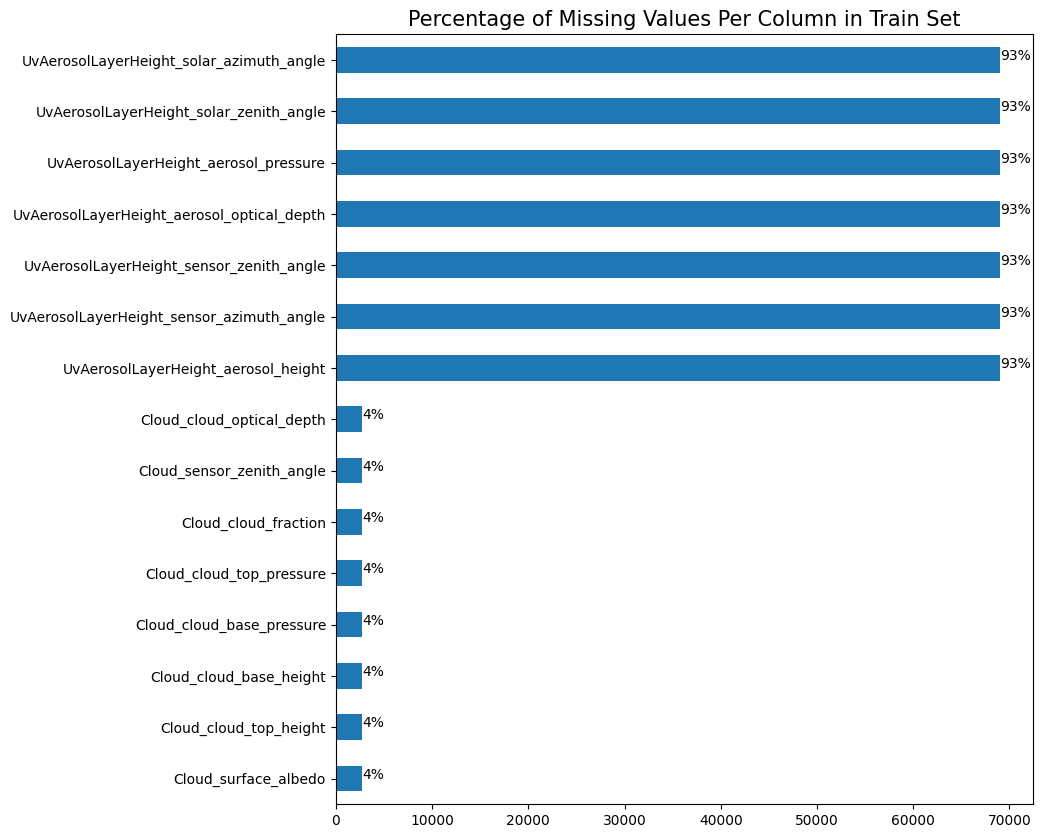

In [12]:
import matplotlib.pyplot as plt

ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

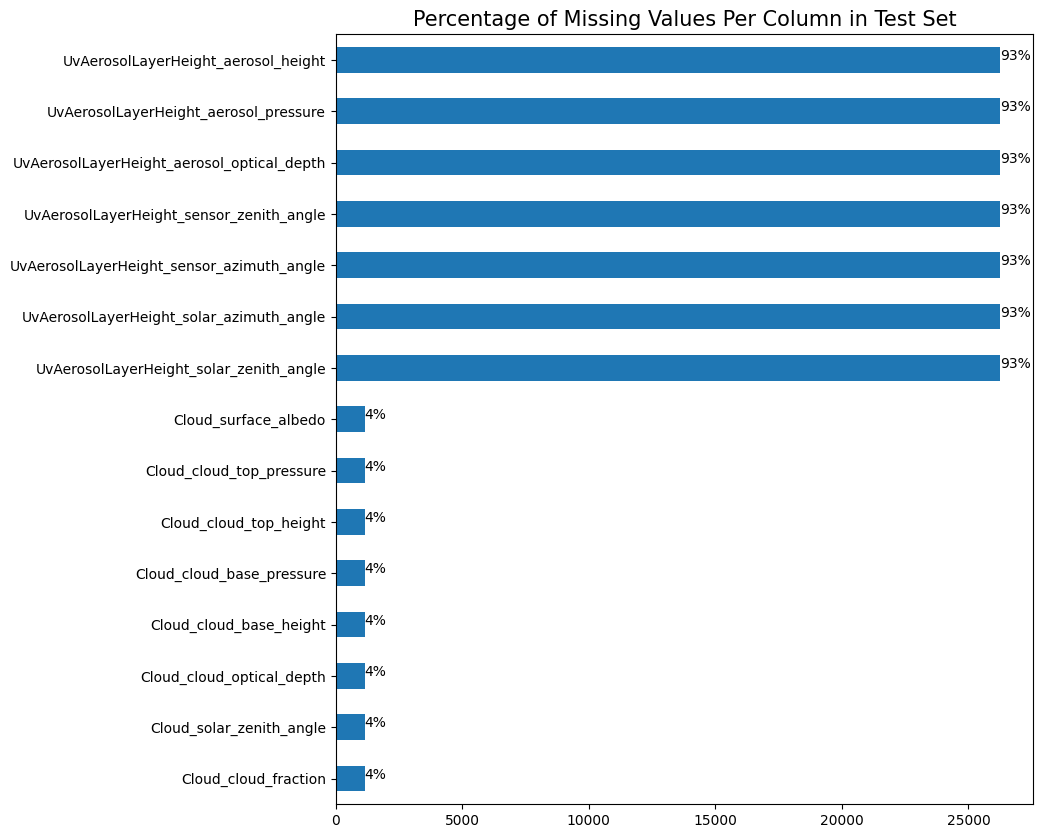

In [13]:
# Plot missing values in train set
ax = test.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

# 3. Exploring the Data

### 3.1 Yearly Emissions

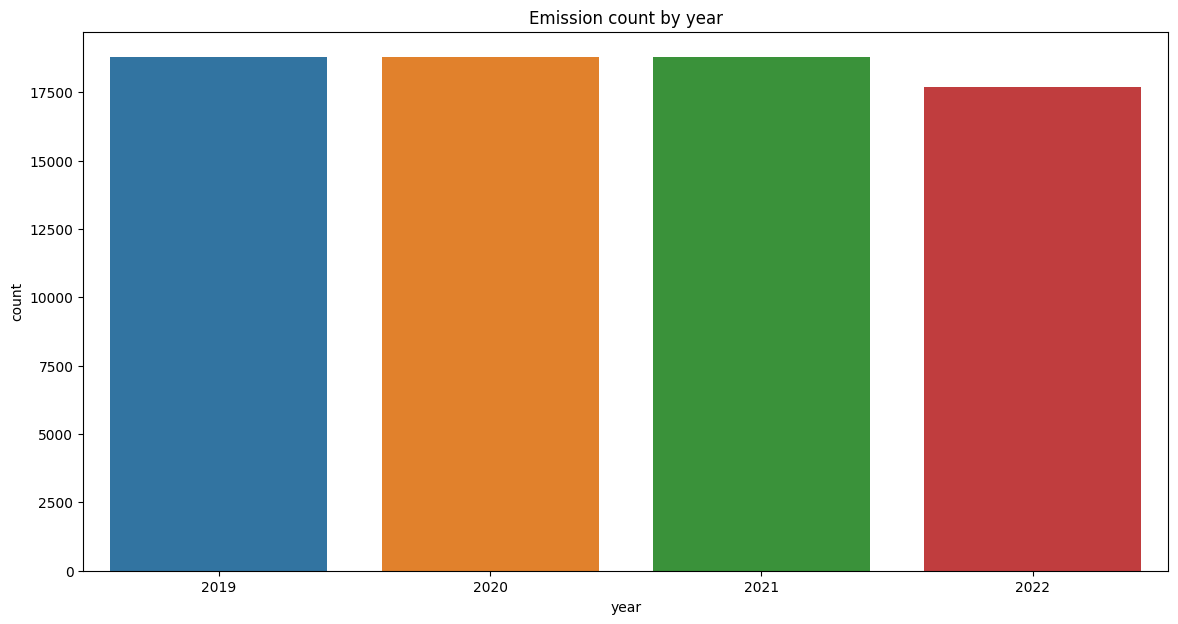

In [14]:
plt.figure(figsize=(14, 7))
sns.countplot(x='year', data=train)
plt.title('Emission count by year')
plt.show()

### 3.2 Weekly Emission count

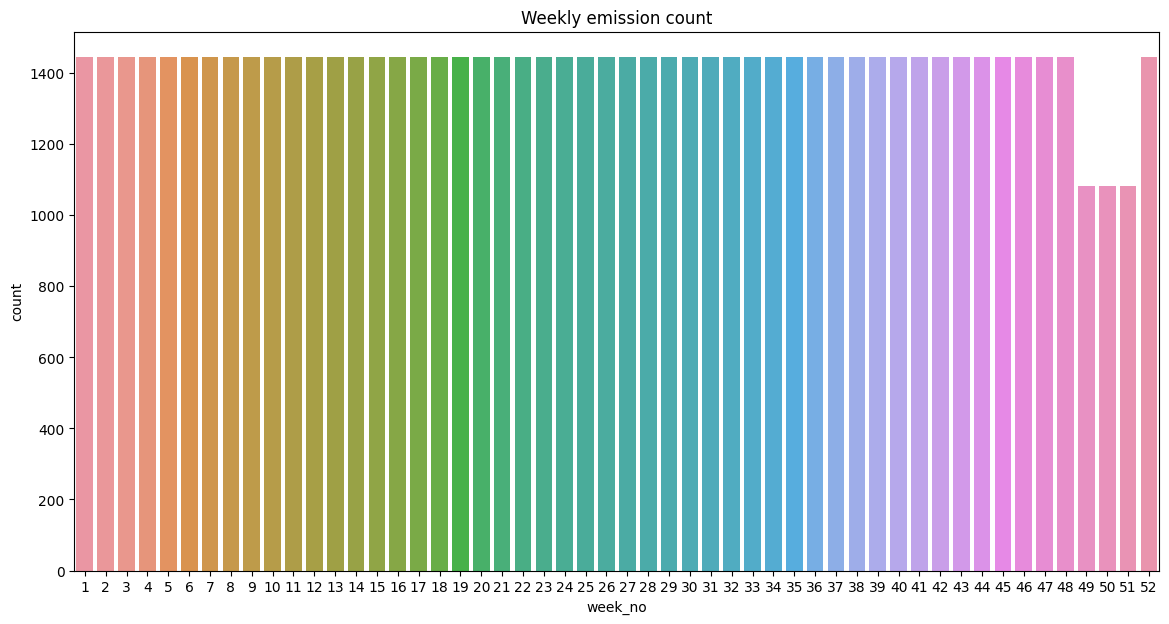

In [15]:
plt.figure(figsize=(14, 7))
sns.countplot(x='week_no', data=train)
plt.title('Weekly emission count')
plt.show()

### 3.3 Time Series Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

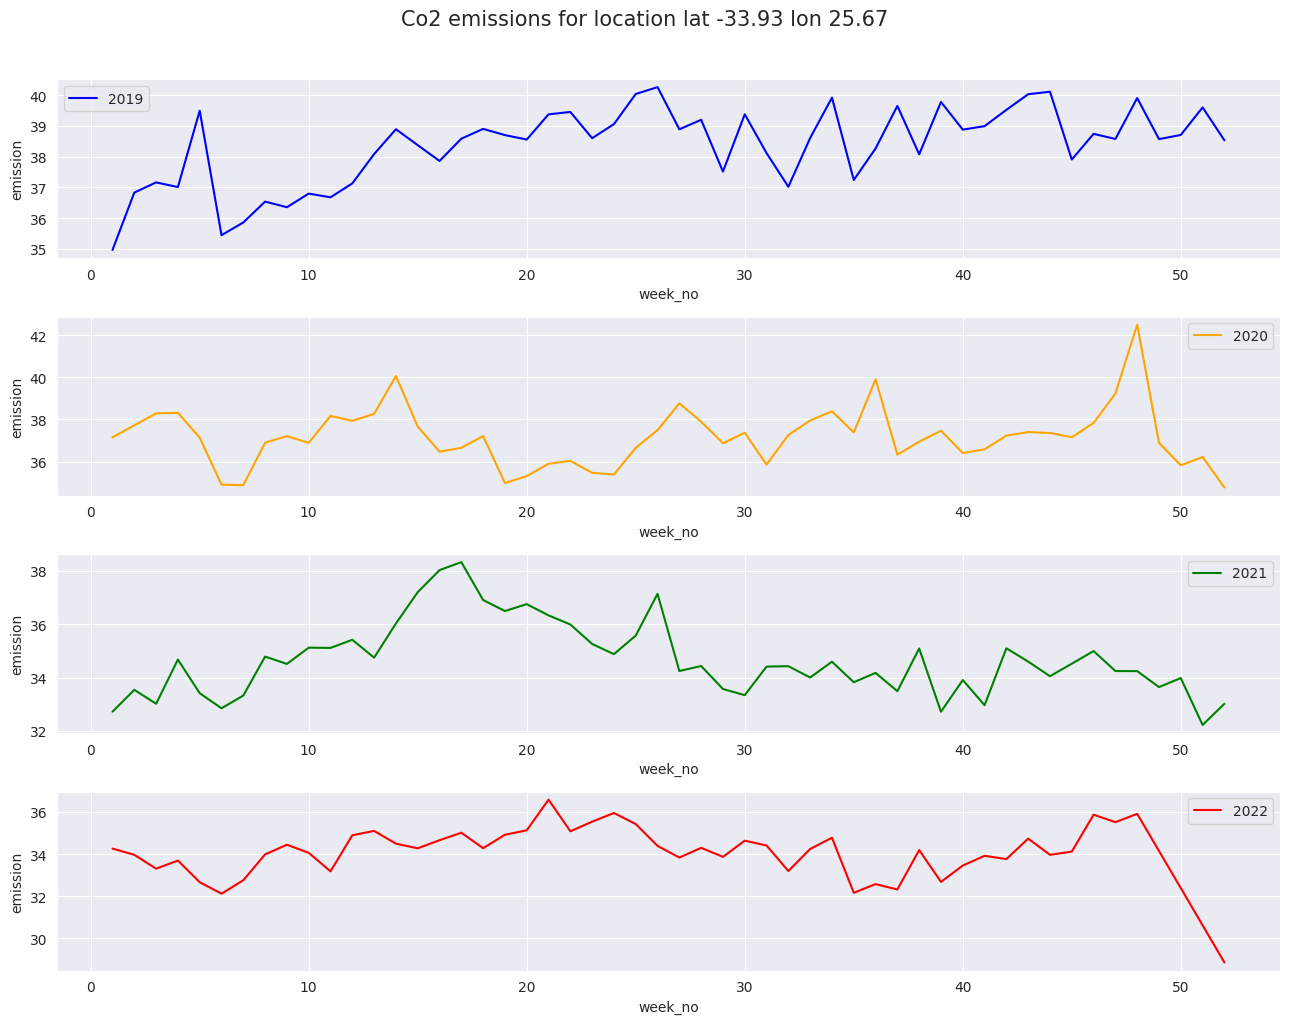

In [16]:
# Sample a unique location and visualize its emissions across the years
train.latitude, train.longitude = round(train.latitude, 2), round(train.longitude, 2)
sample_loc = train[(train.latitude == -33.93) & (train.longitude == 25.67)]

# Plot a line plot
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (13, 10))
fig.suptitle('Co2 emissions for location lat -33.93 lon 25.67', y=1.02, fontsize = 15)

for ax, data, year, color, in zip(axes.flatten(), sample_loc, sample_loc.year.unique(), ['blue','orange', 'green' , 'red']):
    df = sample_loc[sample_loc.year == year]
    sns.lineplot(x=df.week_no,y= df.emission, ax = ax, label = year, color = color)
plt.legend()
plt.tight_layout()

# 4. Feature Engineering

### 4.1 Fixing the missing values

In [17]:
# get missing cols of those greater than 90%
missing_cols = [m for m in train.columns if train[m].isna().sum()/train[m].nunique()>0.9 and m not in ['emission']]

### 4.2 Drop missing data column

In [18]:
# drop those columns
train = train.drop(columns=missing_cols)
test = test.drop(columns=missing_cols)

train.shape

(74005, 69)

### 4.3 Other missing values

In [19]:
other_missing = [m for m in train.columns if train[m].dtype != "O" and m not in ['emission']]

In [20]:
other_missing

['latitude',
 'longitude',
 'year',
 'week_no',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure'

In [28]:
# import matplotlib.pyplot as plt

# ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
# plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
# for p in ax.patches:
#     percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
#     width, height =p.get_width(),p.get_height()
#     x=p.get_x()+width+0.02
#     y=p.get_y()+height/2
#     ax.annotate(percentage,(x,y))

train.SulphurDioxide_SO2_column_number_density.isna().sum()

1930

### 4.4 Sklearn imports 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [31]:
X = train.drop(['ID_LAT_LON_YEAR_WEEK', 'emission'], axis=1)
y = train['emission']

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [32]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 5. Preprocessing

In [33]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# create full pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=seed))
])



In [35]:
# cross validation
scores = -1 * cross_val_score(full_pipeline, X, y,
                              cv=5,
                              scoring='neg_root_mean_squared_error')

print("RMSE scores:\n", scores)

MAE scores:
 [ 1222.01958299 29048.5882226   1364.16505437  7737.9528669
  4212.75747967]


In [36]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
8717.096641306041


In [ ]:
# fit the pipeline
full_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = full_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

In [36]:
# Analyse predictions
pred_errors = X_test.copy()
pred_errors['emission'] = y_test
pred_errors['prediction'] = y_pred
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.emission)
pred_errors = pred_errors[['latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
pred_errors.head()

,latitude,longitude,year,week_no,emission,prediction,error
20362,-25.93,29.37,2020,16,867647.70,440.496525,867207.203475
20394,-25.93,29.37,2020,48,882993.20,334485.548291,548507.651709
20396,-25.93,29.37,2020,50,914555.75,421316.898593,493238.851407
20304,-25.93,29.37,2019,10,1038997.06,606189.901284,432807.158716
20495,-25.93,29.37,2022,45,770798.44,350103.174003,420695.265997


In [37]:
pred_errors.tail()

,latitude,longitude,year,week_no,emission,prediction,error
43773,-28.63,21.27,2021,5,0.315775,0.315408,0.000367
38979,-28.23,21.37,2019,30,0.673923,0.674267,0.000344
28851,-26.83,24.97,2021,48,1.002740,1.002435,0.000304
28634,-26.83,24.87,2021,36,1.391525,1.391774,0.000249
37136,-28.13,21.37,2019,32,0.997752,0.997827,0.000075


In [38]:
# Best Mean Squared Error: 154488139.2312816
# R2 Score: 0.7961332061724407

# Make prediction on the test set
# test_df = test.drop(columns='ID_LAT_LON_YEAR_WEEK', axis = 1).fillna(0)
predictions = full_pipeline.predict(test)

# # Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})
sub_file.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-23.53_27.47_2019_1,2675.522636
1,ID_-23.53_27.47_2019_2,2207.633701
2,ID_-23.53_27.47_2019_3,2263.737342
3,ID_-23.53_27.47_2019_4,3266.308879
4,ID_-23.53_27.47_2019_5,2576.088287


In [38]:
# Create file
sub_file.to_csv('BaselineSubmission-1.csv', index = False)